In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

<Axes: ylabel='Age'>

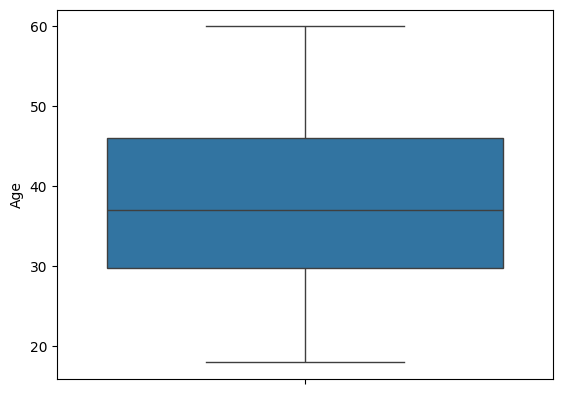

In [6]:
sns.boxplot(data = df["Age"])

In [10]:
#Encode
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["Gender"] = label_encoder.fit_transform(df["Gender"])

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Encoded
0,15624510,1,19,19000,0,1
1,15810944,1,35,20000,0,1
2,15668575,0,26,43000,0,0
3,15603246,0,27,57000,0,0
4,15804002,1,19,76000,0,1


In [13]:
df.drop(["User ID"], axis = 1, inplace = True)
df.head()

,Gender,Age,EstimatedSalary,Purchased,Gender_Encoded
0,1,19,19000,0,1
1,1,35,20000,0,1
2,0,26,43000,0,0
3,0,27,57000,0,0
4,1,19,76000,0,1


In [14]:
def min_max_normalize(feature):
    df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

min_max_normalize("EstimatedSalary")
min_max_normalize("Age")
df.head()

,Gender,Age,EstimatedSalary,Purchased,Gender_Encoded
0,1,0.023810,0.029630,0,1
1,1,0.404762,0.037037,0,1
2,0,0.190476,0.207407,0,0
3,0,0.214286,0.311111,0,0
4,1,0.023810,0.451852,0,1


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [16]:
X = df[["Gender","Age","EstimatedSalary"]]
y = df["Purchased"]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [21]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.875
Confusion Matrix:
 [[51  1]
 [ 9 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80



In [24]:
# True Positive: Model predicted 1 and it was actually 1
tp = ((y_pred == 1) & (y_test == 1)).sum()

# False Positive: Model predicted 1 but it was actually 0
fp = ((y_pred == 1) & (y_test == 0)).sum()

# True Negative: Model predicted 0 and it was actually 0
tn = ((y_pred == 0) & (y_test == 0)).sum()

# False Negative: Model predicted 0 but it was actually 1
fn = ((y_pred == 0) & (y_test == 1)).sum()

In [25]:
recall = tp/(tp + fn)
accuracy = (tp + tn)/(tp + fp + tn + fn)
precision = tp / (tp + fp)
error = 1 - accuracy
f1 = (2 * recall * precision)/(recall + precision)

In [26]:
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)

Recall:  0.6785714285714286
Precision:  0.95
Accuracy:  0.875
F1 Score:  0.7916666666666667
